# Psychoinformatics - Week 13 (Exercises)
by your name (your email)

## 1 進一步研究CNN (3 points)

### 1.1 為何ResNet50會判斷小女孩照片為ping-pong_bal, bubble, or Band_Aid? (3 points)

In [2]:
import numpy as np
import urllib.request
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

model = ResNet50(weights='imagenet')

urllib.request.urlretrieve('http://mil.psy.ntu.edu.tw/~tren/girl.jpg','girl.jpg')
img = image.load_img('girl.jpg', target_size=(224, 224)) # Or use cv2.resize to resize images
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])






35363/35363 [==============================] - 0s 1us/step
Predicted: [('n03942813', 'ping-pong_ball', 0.17623495), ('n09229709', 'bubble', 0.10817222), ('n02786058', 'Band_Aid', 0.089543626)]
Predicted: [('n03942813', 'ping-pong_ball', 0.17623495), ('n09229709', 'bubble', 0.10817222), ('n02786058', 'Band_Aid', 0.089543626)]


### 討論：為何 ResNet50 把 girl.jpg 誤判成 ping-pong_ball / bubble / Band_Aid
- **資料集偏差**：ImageNet 沒有「人臉」或「小孩臉」的明確類別，模型被迫在現有 1000 類中找最像的物件，常落在圓形/平滑表面類（球、貼布）。
- **外觀相似線索**：臉部高光、圓形臉型、亮背景，與 ping-pong_ball 或 bubble 的材質/形狀特徵相似；臉上亮斑與 Band_Aid 類的貼片/亮斑特徵疊合。
- **缺乏上下文**：ImageNet 模型只看局部外觀，不理解「這是人臉」的語意，缺少人臉/表情任務的語境。
- **尺寸與裁切**：人臉占畫面比例較小且居中，ResNet50 更偏向辨識整體形狀與紋理而非五官細節。
- **Softmax 強迫挑選**：即使沒有合適的類別，Softmax 仍會輸出機率分佈並挑出前三名，使錯誤的物件類別顯得「最合理」。
- **改進方向**：使用人臉專用模型（如 FaceNet、VGGFace、MTCNN + 表情模型）或使用含人臉類別的資料集微調；也可在預處理時放大人臉區域、加入上下文/多任務學習以降低物件偏差。

### 1.2 請展示有別人pre-trained好的Keras model可以成功辨認girl.jpg為人臉 (3 points)


Detected 1 face(s)
Detected 1 face(s)


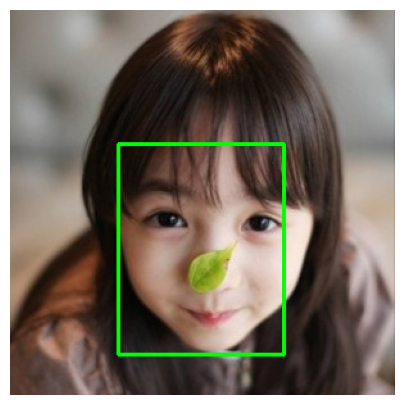

In [3]:
# Pre-trained face detector (MTCNN, Keras/TensorFlow backend) to verify the image is a face
try:
    from mtcnn import MTCNN
except ImportError:  # install once if missing
    import sys, subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "mtcnn", "matplotlib"])
    from mtcnn import MTCNN

import urllib.request
import matplotlib.pyplot as plt
import cv2

# Download the image (same as previous cell)
urllib.request.urlretrieve('http://mil.psy.ntu.edu.tw/~tren/girl.jpg', 'girl.jpg')
img_bgr = cv2.imread('girl.jpg')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Run face detection
face_detector = MTCNN()
results = face_detector.detect_faces(img_rgb)
print(f"Detected {len(results)} face(s)")

# Draw the first detected face box
if results:
    x, y, w, h = results[0]['box']
    cv2.rectangle(img_rgb, (x, y), (x + w, y + h), (0, 255, 0), 2)
    plt.figure(figsize=(5, 5))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()
else:
    print('No face detected — please check the image or detector.')